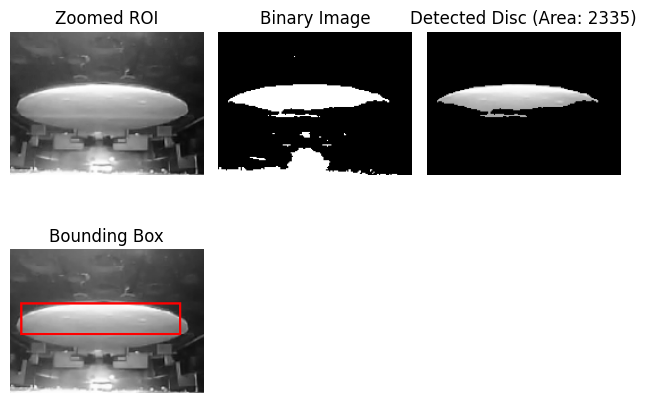

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes, label

def detect_disc_with_roi(image_path, area_threshold, circularity_threshold):
    # Step 1: Load and preprocess the image
    image = Image.open(image_path)
    image_array = np.array(image)

    # Convert to grayscale
    grayscale = np.dot(image_array[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

    # Normalize pixel values
    grayscale = (grayscale - grayscale.min()) / (grayscale.max() - grayscale.min()) * 255
    grayscale = grayscale.astype(np.uint8)

    # Define ROI: Zoom in 50%
    height, width = grayscale.shape
    zoom_scale = 0.35  # Zoom factor: 50%
    new_width = int(width * zoom_scale)
    new_height = int(height * zoom_scale)

    x_start = (width - new_width) // 2
    x_end = x_start + new_width
    y_start = (height - new_height) // 2
    y_end = y_start + new_height

    roi = grayscale[y_start:y_end, x_start:x_end]

    # Display the ROI
    plt.subplot(2, 3, 1)
    plt.imshow(roi, cmap="gray")
    plt.title("Zoomed ROI")
    plt.axis("off")

    # Step 2: Apply adaptive thresholding
    threshold = roi > (roi.mean() + roi.std())
    binary = binary_fill_holes(threshold).astype(np.uint8)

    # Display binary image
    plt.subplot(2, 3, 2)
    plt.imshow(binary, cmap="gray")
    plt.title("Binary Image")
    plt.axis("off")

    # Step 3: Detect blobs using connected components
    labeled_array, num_features = label(binary)
    regions = []
    for label_id in range(1, num_features + 1):
        indices = np.argwhere(labeled_array == label_id)
        area = len(indices)
        if area >= area_threshold:
            regions.append((label_id, area, indices))

    # Step 4: Analyze regions for circularity
    best_blob = None
    best_circularity = 0
    for label_id, area, indices in regions:
        # Bounding box of the blob
        min_x, min_y = indices.min(axis=0)
        max_x, max_y = indices.max(axis=0)

        # Calculate perimeter (approximation)
        perimeter = (2 * (max_x - min_x) + 2 * (max_y - min_y))

        # Calculate circularity
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        if circularity > best_circularity and circularity >= circularity_threshold:
            best_circularity = circularity
            best_blob = (label_id, area, indices, (min_x, min_y, max_x, max_y))

    if best_blob:
        label_id, area, indices, bbox = best_blob
        min_x, min_y, max_x, max_y = bbox

        # Step 5: Visualize the detected disc
        disc_mask = (labeled_array == label_id).astype(np.uint8)
        detected_disc = roi * disc_mask

        plt.subplot(2, 3, 3)
        plt.imshow(detected_disc, cmap="gray")
        plt.title(f"Detected Disc (Area: {area})")
        plt.axis("off")

        # Draw bounding box
        boxed_image = Image.fromarray(roi).convert("RGB")
        draw = ImageDraw.Draw(boxed_image)
        draw.rectangle([min_y, min_x, max_y, max_x], outline="red", width=2)

        plt.subplot(2, 3, 4)
        plt.imshow(boxed_image)
        plt.title("Bounding Box")
        plt.axis("off")

    else:
        print("No disc detected.")
        plt.subplot(2, 3, 3)
        plt.text(0.5, 0.5, "No Disc Found", ha="center", va="center")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
detect_disc_with_roi("Discc/4.jpg", area_threshold=200, circularity_threshold=0.14)

### Size Estimation

Pixel-to-Inch Ratio: 0.06578947368421052
Estimated Diameter for Discc/2.jpg: 5.07 inches


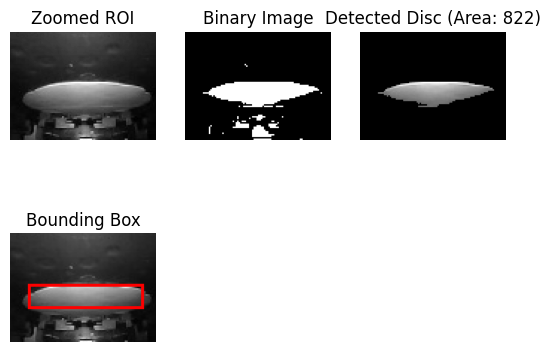

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes, label

def detect_disc_with_roi(image_path, area_threshold, circularity_threshold, zoom_scale=0.5):
    # Step 1: Load and preprocess the image
    image = Image.open(image_path)
    image_array = np.array(image)

    # Convert to grayscale
    grayscale = np.dot(image_array[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

    # Normalize pixel values
    grayscale = (grayscale - grayscale.min()) / (grayscale.max() - grayscale.min()) * 255
    grayscale = grayscale.astype(np.uint8)

    # Define ROI: Zoom in
    height, width = grayscale.shape
    new_width = int(width * zoom_scale)
    new_height = int(height * zoom_scale)

    x_start = (width - new_width) // 2
    x_end = x_start + new_width
    y_start = (height - new_height) // 2
    y_end = y_start + new_height

    roi = grayscale[y_start:y_end, x_start:x_end]

    # Display the ROI
    plt.subplot(2, 3, 1)
    plt.imshow(roi, cmap="gray")
    plt.title("Zoomed ROI")
    plt.axis("off")

    # Step 2: Apply adaptive thresholding
    threshold = roi > (roi.mean() + roi.std())
    binary = binary_fill_holes(threshold).astype(np.uint8)

    # Display binary image
    plt.subplot(2, 3, 2)
    plt.imshow(binary, cmap="gray")
    plt.title("Binary Image")
    plt.axis("off")

    # Step 3: Detect blobs using connected components
    labeled_array, num_features = label(binary)
    regions = []
    for label_id in range(1, num_features + 1):
        indices = np.argwhere(labeled_array == label_id)
        area = len(indices)
        if area >= area_threshold:
            regions.append((label_id, area, indices))

    # Step 4: Analyze regions for circularity
    best_blob = None
    best_circularity = 0
    for label_id, area, indices in regions:
        # Bounding box of the blob
        min_x, min_y = indices.min(axis=0)
        max_x, max_y = indices.max(axis=0)

        # Calculate perimeter (approximation)
        perimeter = (2 * (max_x - min_x) + 2 * (max_y - min_y))

        # Calculate circularity
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        if circularity > best_circularity and circularity >= circularity_threshold:
            best_circularity = circularity
            best_blob = (label_id, area, indices, (min_x, min_y, max_x, max_y))

    if best_blob:
        label_id, area, indices, bbox = best_blob
        min_x, min_y, max_x, max_y = bbox

        # Step 5: Visualize the detected disc
        disc_mask = (labeled_array == label_id).astype(np.uint8)
        detected_disc = roi * disc_mask

        plt.subplot(2, 3, 3)
        plt.imshow(detected_disc, cmap="gray")
        plt.title(f"Detected Disc (Area: {area})")
        plt.axis("off")

        # Draw bounding box
        boxed_image = Image.fromarray(roi).convert("RGB")
        draw = ImageDraw.Draw(boxed_image)
        draw.rectangle([min_y, min_x, max_y, max_x], outline="red", width=2)

        plt.subplot(2, 3, 4)
        plt.imshow(boxed_image)
        plt.title("Bounding Box")
        plt.axis("off")

        # Calculate diameter
        disc_diameter_pixels = max(max_x - min_x, max_y - min_y)
        return disc_diameter_pixels  # Return the diameter in pixels for further processing
    else:
        print("No disc detected.")
        return None

# Calculate pixel-to-inch ratio
def calculate_pixel_to_inch_ratio(reference_image_path, known_diameter_in_inches, **kwargs):
    disc_diameter_pixels = detect_disc_with_roi(reference_image_path, **kwargs)
    if disc_diameter_pixels:
        return known_diameter_in_inches / disc_diameter_pixels
    else:
        raise ValueError("Failed to detect disc in the reference image.")

# Test images using the calculated ratio
def estimate_disc_diameter(image_path, pixel_to_inch_ratio, **kwargs):
    disc_diameter_pixels = detect_disc_with_roi(image_path, **kwargs)
    if disc_diameter_pixels:
        return disc_diameter_pixels * pixel_to_inch_ratio  # Diameter in inches
    else:
        return None

# Example usage
reference_image = "Discc/1.jpg"
test_image = "Discc/3.jpg"
known_diameter_in_inches = 5  # Diameter of the disc in the reference image

# Step 1: Calculate pixel-to-inch ratio
area_threshold = 200
circularity_threshold = 0.14
zoom_scale = 0.35  # 50% zoom
pixel_to_inch_ratio = calculate_pixel_to_inch_ratio(
    reference_image, known_diameter_in_inches,
    area_threshold=area_threshold, circularity_threshold=circularity_threshold, zoom_scale=zoom_scale
)

print(f"Pixel-to-Inch Ratio: {pixel_to_inch_ratio}")

# Step 2: Estimate diameter for a test image
estimated_diameter = estimate_disc_diameter(
    test_image, pixel_to_inch_ratio,
    area_threshold=area_threshold, circularity_threshold=circularity_threshold, zoom_scale=zoom_scale
)

if estimated_diameter:
    print(f"Estimated Diameter for {test_image}: {estimated_diameter:.2f} inches")
else:
    print("Disc not detected in the test image.")


# Pixel-to-Inch Ratio: 0.06578947368421052

## With OpenCv

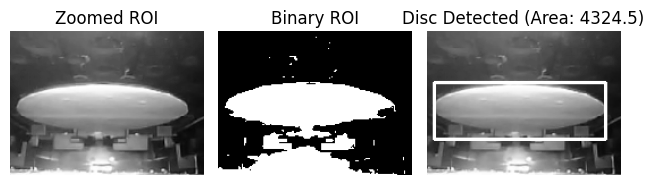

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_disc_with_roi(image_path, area_threshold, circularity_threshold):
    # Step 1: Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Define and extract the ROI (zoom 50%)
    height, width = grayscale.shape
    zoom_scale = 0.35  # Zoom factor: 50%
    new_width = int(width * zoom_scale)
    new_height = int(height * zoom_scale)

    x_start = (width - new_width) // 2
    x_end = x_start + new_width
    y_start = (height - new_height) // 2
    y_end = y_start + new_height

    roi = grayscale[y_start:y_end, x_start:x_end]

    # Display the extracted ROI
    plt.subplot(2, 3, 1)
    plt.imshow(roi, cmap="gray")
    plt.title("Zoomed ROI")
    plt.axis("off")

    # Step 3: Apply binary thresholding to the ROI
    _, binary = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)

    # Display the binary image
    plt.subplot(2, 3, 2)
    plt.imshow(binary, cmap="gray")
    plt.title("Binary ROI")
    plt.axis("off")

    # Step 4: Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Find the largest contour (the disc) based on area
    largest_contour = None
    largest_area = 0

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > largest_area and area >= area_threshold:
            largest_area = area
            largest_contour = contour

    # Step 6: Calculate circularity and verify if it's a disc
    if largest_contour is not None:
        # Calculate the perimeter (circumference) of the contour
        perimeter = cv2.arcLength(largest_contour, True)

        # Calculate the circularity (C = 4 * pi * area / perimeter^2)
        circularity = (4 * np.pi * largest_area) / (perimeter ** 2)

        if circularity >= circularity_threshold:
            # Draw the bounding box around the detected disc
            x, y, w, h = cv2.boundingRect(largest_contour)
            cv2.rectangle(roi, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Display the result
            plt.subplot(2, 3, 3)
            plt.imshow(roi, cmap="gray")
            plt.title(f"Disc Detected (Area: {largest_area})")
            plt.axis("off")

            # Draw the contour on the original image for visualization
            image_with_contour = image.copy()
            cv2.drawContours(image_with_contour, [largest_contour], -1, (0, 255, 0), 2)
            cv2.rectangle(image_with_contour, (x + x_start, y + y_start), (x + x_start + w, y + y_start + h), (255, 0, 0), 2)

        else:
            print("Detected blob is not a valid disc.")
            plt.subplot(2, 3, 3)
            plt.text(0.5, 0.5, "No Valid Disc Found", ha="center", va="center")
            plt.axis("off")
    else:
        print("No disc detected.")
        plt.subplot(2, 3, 3)
        plt.text(0.5, 0.5, "No Disc Found", ha="center", va="center")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
detect_disc_with_roi("Discc/4.jpg", area_threshold=100, circularity_threshold=0.15)
